In [113]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [114]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [115]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [116]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [117]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [118]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [119]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [120]:
history = model.fit(x_train, y_train,
          batch_size=512,
          epochs=50,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/50
118/118 [==============================] - 5s 39ms/step - loss: 0.6270 - accuracy: 0.7806 - val_loss: 0.4418 - val_accuracy: 0.8423
Epoch 2/50
118/118 [==============================] - 5s 47ms/step - loss: 0.4137 - accuracy: 0.8514 - val_loss: 0.3869 - val_accuracy: 0.8595
Epoch 3/50
118/118 [==============================] - 4s 36ms/step - loss: 0.3642 - accuracy: 0.8679 - val_loss: 0.3994 - val_accuracy: 0.8537
Epoch 4/50
118/118 [==============================] - 4s 36ms/step - loss: 0.3409 - accuracy: 0.8761 - val_loss: 0.3572 - val_accuracy: 0.8721
Epoch 5/50
118/118 [==============================] - 5s 46ms/step - loss: 0.3209 - accuracy: 0.8822 - val_loss: 0.3608 - val_accuracy: 0.8668
Epoch 6/50
118/118 [==============================] - 4s 36ms/step - loss: 0.3061 - accuracy: 0.8875 - val_loss: 0.3410 - val_accuracy: 0.8794
Epoch 7/50
118/118 [==============================] - 4s 35ms/step - loss: 0.2943 - accuracy: 0.8922 - val_loss: 0.3391 - val_accuracy: 0.8775

In [121]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.3508 - accuracy: 0.9011
[0.3507825434207916, 0.9010999798774719]


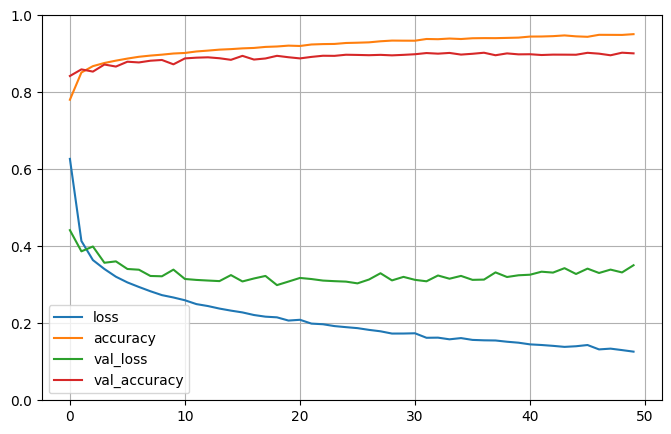

In [122]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1/1 [==============================] - 0s 67ms/step


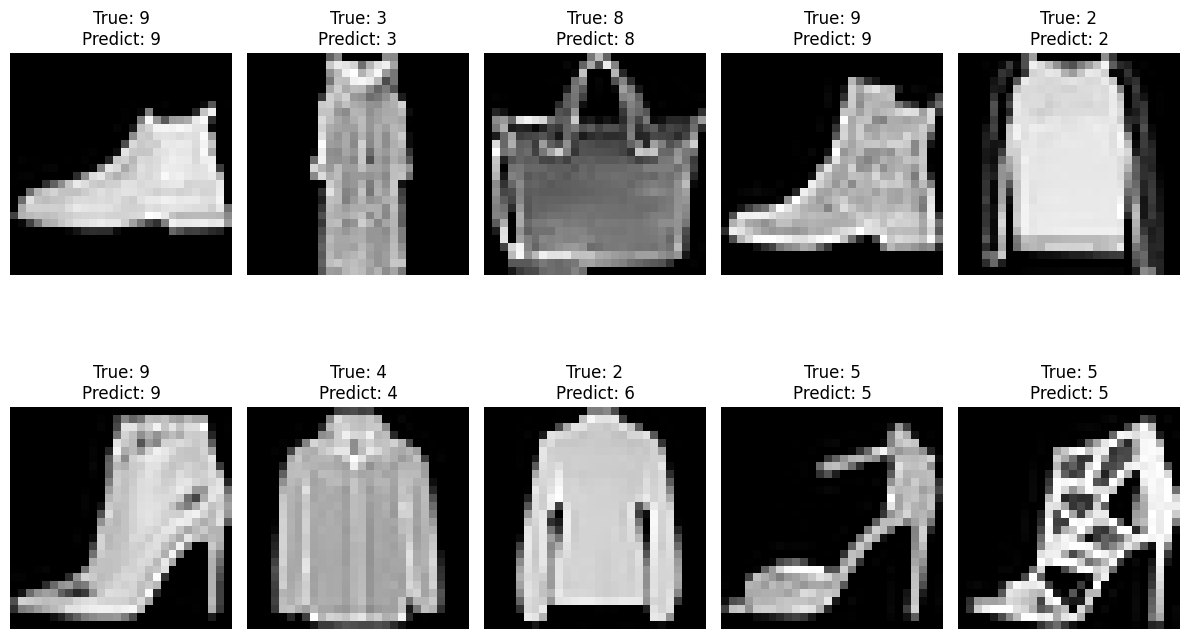

In [123]:
num_images = 10
random_indices = np.random.choice(range(len(x_test)), size=num_images, replace=False)
predictions = model.predict(x_test[random_indices])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 8))
for i, index in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title("True: %s\nPredict: %s" % (np.argmax(y_test[index]), predicted_labels[i]))
    plt.axis('off')

plt.tight_layout()
plt.show()